In [3]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *

%matplotlib inline

In [4]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.5

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

In [5]:
T = 50
h = 0.01

In [6]:
def findh(h0, rs, vs):
    h = h0
    for i, ri in enumerate(rs):
        for j, rj in enumerate(rs):
            if i != j:
                r_mag = np.linalg.norm(ri - rj)
                v_mag = np.linalg.norm(vs[i] - vs[j])
                h = min(h, r_mag / v_mag)
    return h

In [7]:
traj = run_scheme(LeapfrogStep, 0, T, h, r0s, v0s, G, masses)
t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj

r_mags = np.linalg.norm(rs_traj[:,0,:]-rs_traj[:,1,:], axis = 1)

hs = [findh(np.inf, rs_traj[i], vs_traj[i]) for i in range(len(rs_traj))]


C:\Users\s2444261\AppData\Local\Temp\ipykernel_11508\2412931211.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


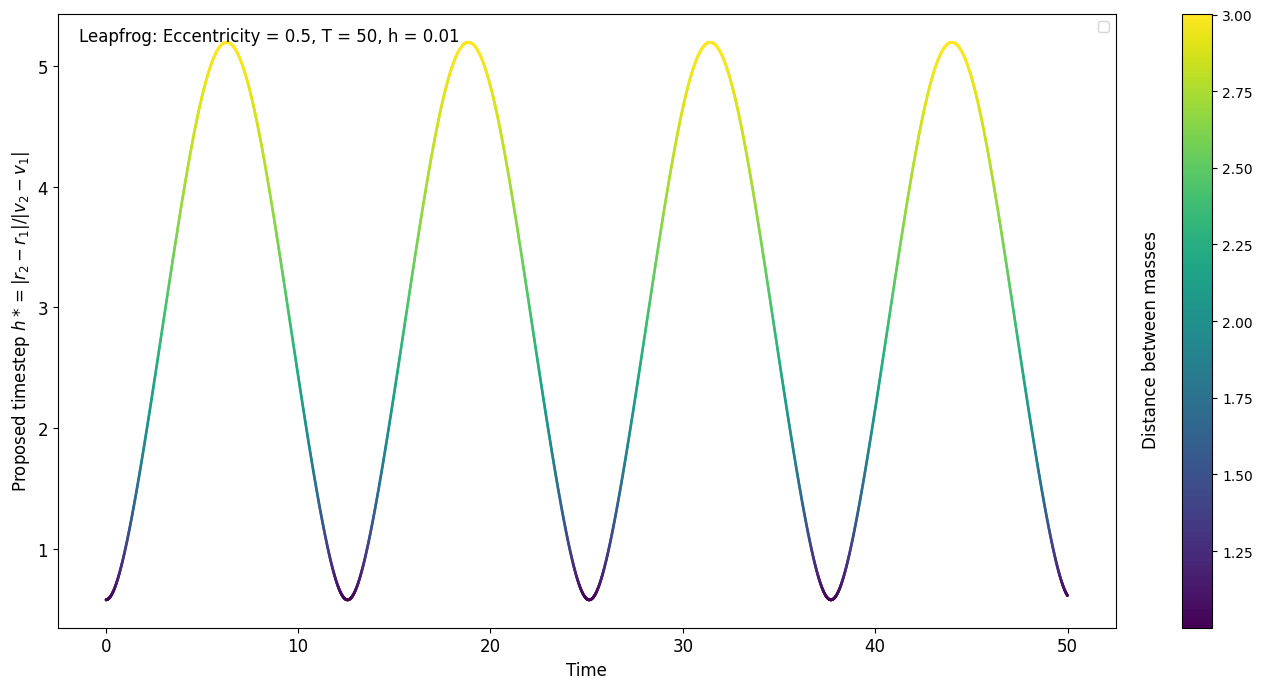

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(14,7))

scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
colorbar = plt.colorbar(scatter, ax=ax)
# colorbar.set_label('Distance between masses', rotation = 270, x = 0.8)
ax.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel(r'Proposed timestep $h* = |r_2 - r_1| / |v_2 - v_1|$', fontsize = 12)
ax.set_xlabel('Time', fontsize = 12)

ax.text(0.02, 0.98, f'Leapfrog: Eccentricity = 0.5, T = {T}, h = {h}', transform=ax.transAxes, 
            va='top', fontsize = 12)
ax.text(1.025, 0.3, f'Distance between masses', transform=ax.transAxes, fontsize = 12, rotation = 90)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Leapfrog Changing stepsize.pdf', format = 'pdf')


In [39]:
T = 100
traj = run_scheme(EulerStep, 0, T, h, r0s, v0s, G, masses)
t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj

r_mags = np.linalg.norm(rs_traj[:,0,:]-rs_traj[:,1,:], axis = 1)

hs = [findh(np.inf, rs_traj[i], vs_traj[i]) for i in range(len(rs_traj))]

C:\Users\s2444261\AppData\Local\Temp\ipykernel_11508\1773161079.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


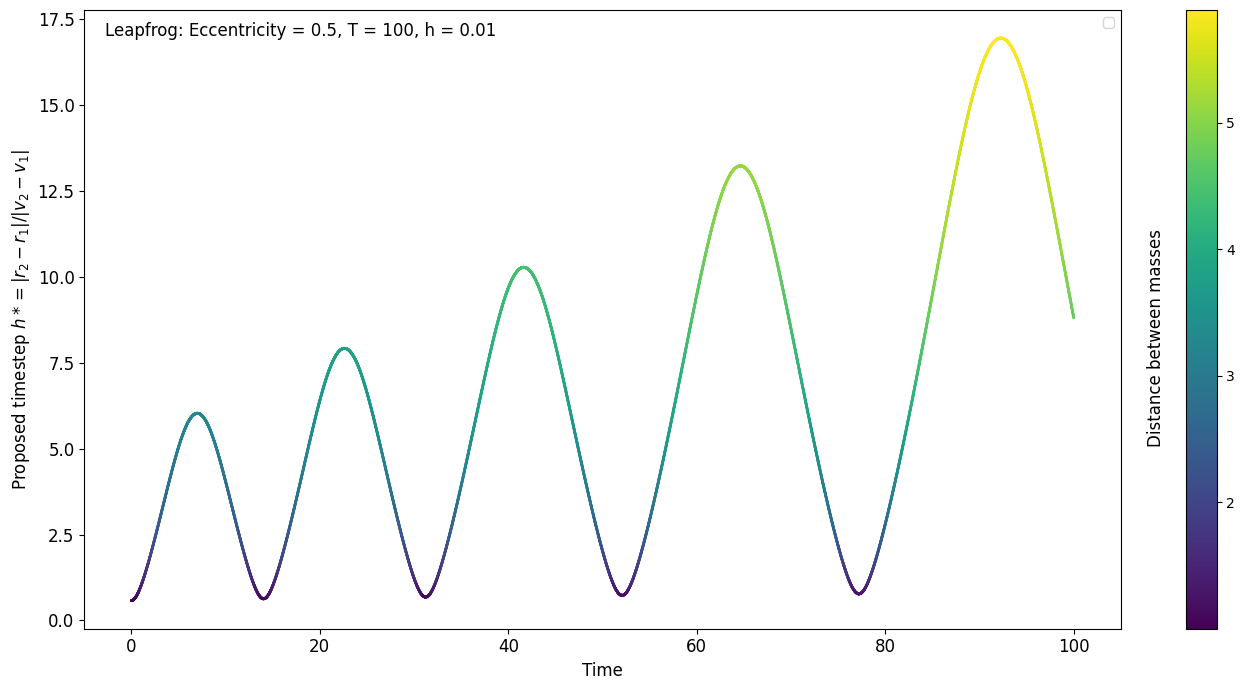

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(14,7))

scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
colorbar = plt.colorbar(scatter, ax=ax)
# colorbar.set_label('Distance between masses', rotation = 270, x = 0.8)
ax.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel(r'Proposed timestep $h* = |r_2 - r_1| / |v_2 - v_1|$', fontsize = 12)
ax.set_xlabel('Time', fontsize = 12)

ax.text(0.02, 0.98, f'Leapfrog: Eccentricity = 0.5, T = {T}, h = {h}', transform=ax.transAxes, 
            va='top', fontsize = 12)
ax.text(1.025, 0.3, f'Distance between masses', transform=ax.transAxes, fontsize = 12, rotation = 90)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Euler Changing stepsize.pdf', format = 'pdf')